In [2]:
import time

import mysql.connector
from Params import hostSQL, userSQL, passwdSQL, databaseSQL
import os
import json
import pandas as pd

import matplotlib.pyplot as plt 


In [3]:

mydb = mysql.connector.connect(
    host=hostSQL,
    user=userSQL,
    passwd=passwdSQL,
    auth_plugin='mysql_native_password',
    database=databaseSQL
)

mycursor = mydb.cursor()


In [4]:
sql = 'SELECT * FROM chatroom'
mycursor.execute(sql)
chatlog = mycursor.fetchall()

sql = 'DESCRIBE chatroom'
mycursor.execute(sql)
chatDescribe = mycursor.fetchall()

columns = []
for i in chatDescribe:
    columns.append(i[0])

df = pd.DataFrame(chatlog, columns=columns)

df['chat_line'] = df.chat_line.str[:-1]

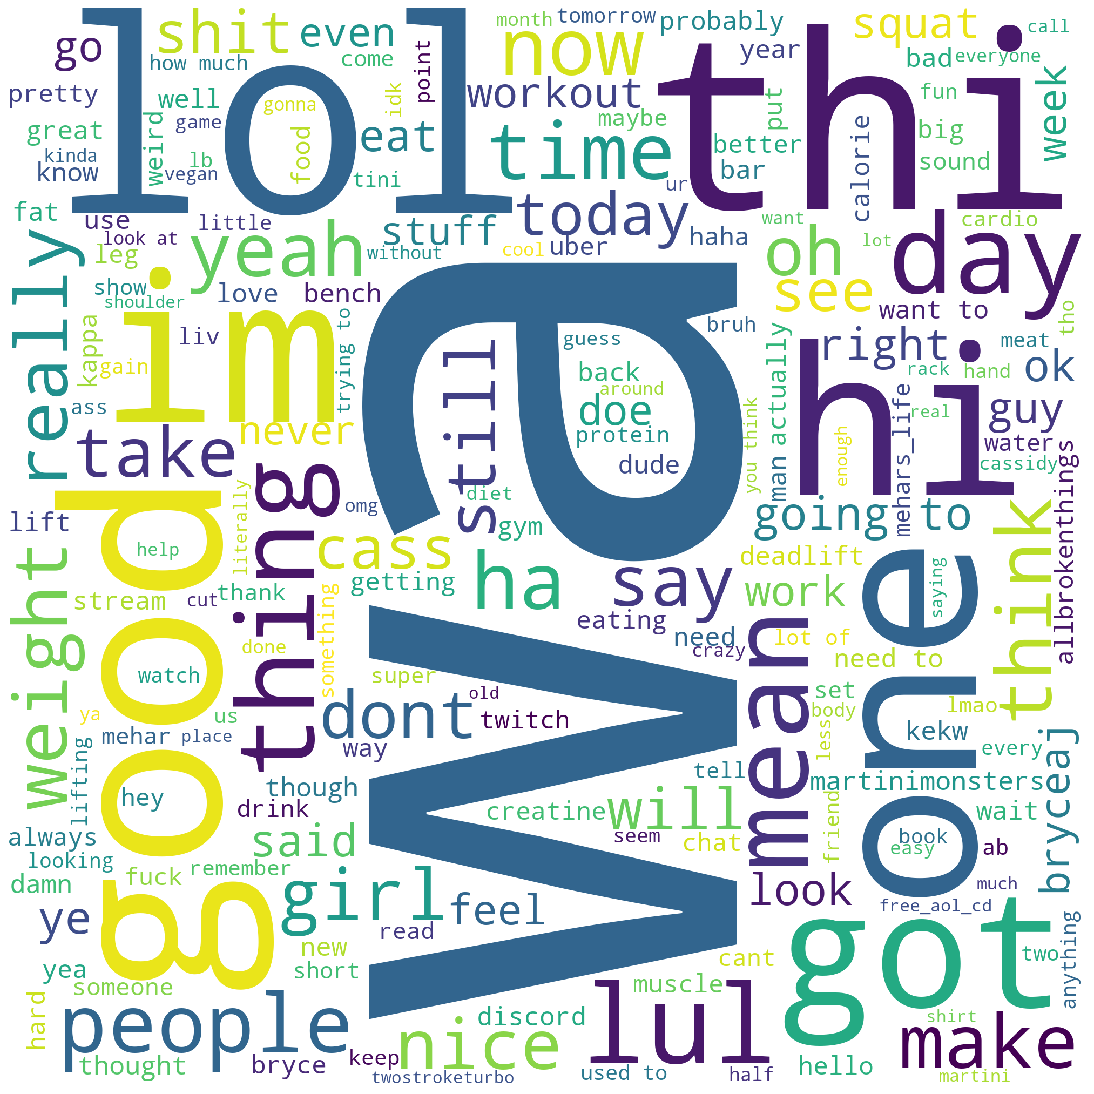

In [5]:
martonoChat = df[df['chatchannel'] == 'martinimonsters']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.chat_line: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

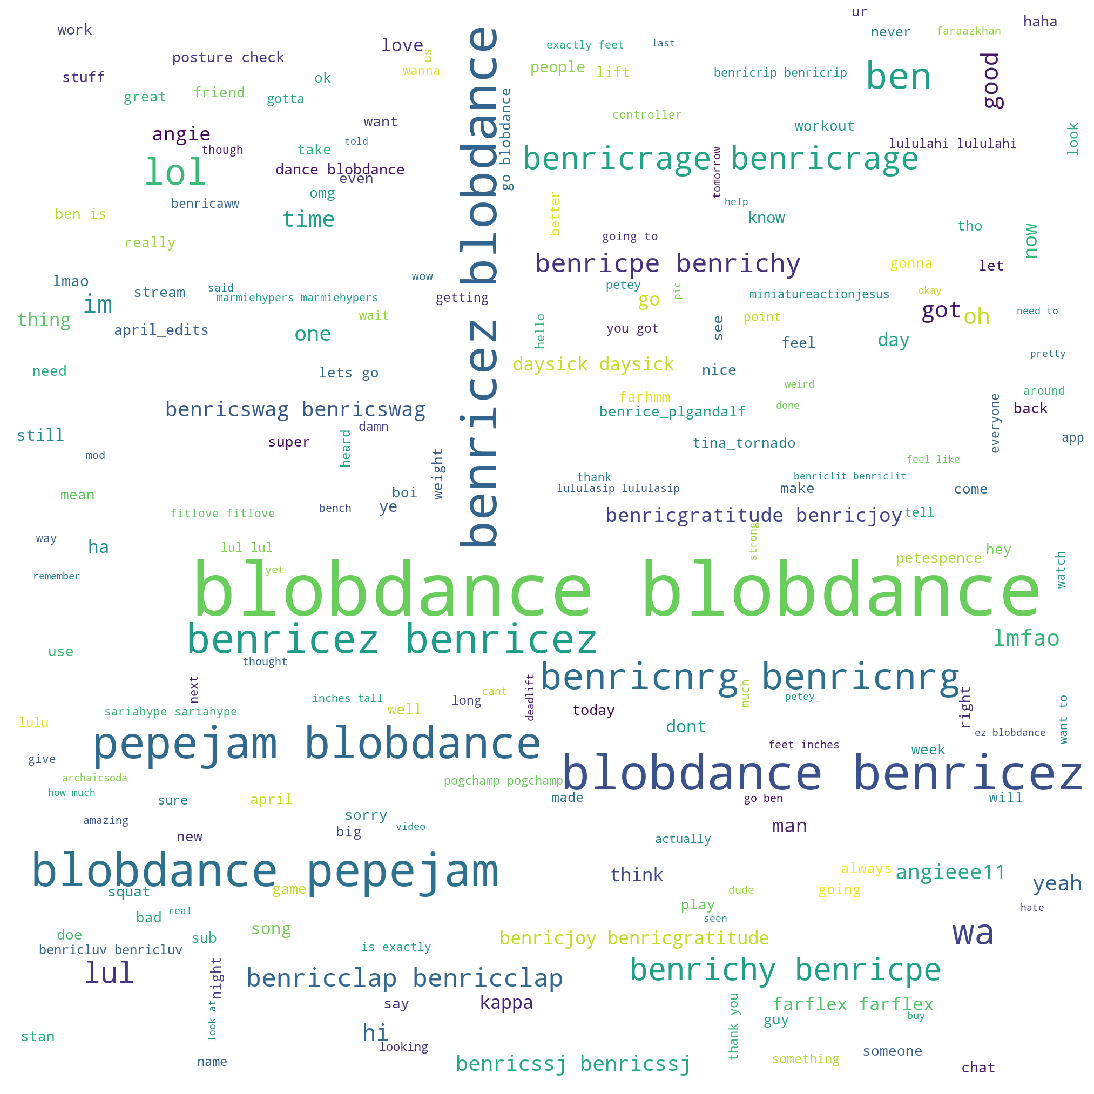

In [9]:
martonoChat = df[df['chatchannel'] == 'benrice_plgandalf']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.chat_line: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [8]:
df[df['chatchannel']== 'benrice_plgandalf']

,from_ID,display_name,chat_line,sent_at,chatchannel
627,66685655.0,angieee11,im shook still.,2020-04-29 00:05:03,benrice_plgandalf
628,66685655.0,angieee11,@MoonbearBB do u need a new mod? im looking fo...,2020-04-29 00:05:17,benrice_plgandalf
629,88785194.0,ubercruzer,"that's my bot, do not be alarmed.",2020-04-29 00:05:19,benrice_plgandalf
630,88785194.0,ubercruzer,he's loyal to me.,2020-04-29 00:05:26,benrice_plgandalf
631,125420948.0,moonbearbb,@Angieee11 LOW KEY WE MIGHT,2020-04-29 00:05:28,benrice_plgandalf
...,...,...,...,...,...
53707,82709009.0,archaicsoda,SCREW ANALYTICS!,2020-05-10 03:02:43,benrice_plgandalf
53708,66685655.0,angieee11,"""we gotta transfer to not gifted subs"" Chat gi...",2020-05-10 03:02:48,benrice_plgandalf
53709,102775943.0,r3dwood34,nope but money money,2020-05-10 03:02:49,benrice_plgandalf
53710,66685655.0,angieee11,CHAT THIS WILL HELP US,2020-05-10 03:03:08,benrice_plgandalf
